<a href="https://colab.research.google.com/github/Afkar5115/Visi_Komputer_2025/blob/main/Jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKASI GAMBAR

## Praktikum

### D1 – Memulai Klasifikasi Gambar (MNIST)

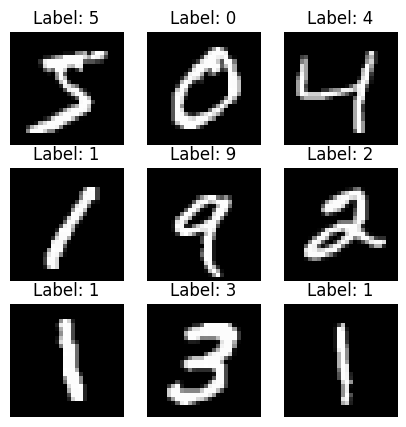

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

#### Tugas Kecil

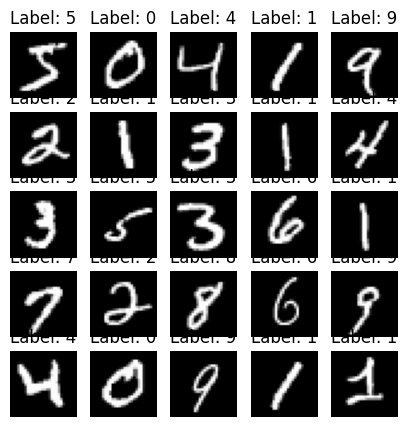

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

### D2 – Klasifikasi Tradisional dengan SVM (MNIST)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten: Mengubah gambar 28x28 menjadi vektor 1x784
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# Inisialisasi model SVM
# Gunakan subset data (5000 gambar) agar proses training tidak terlalu lama
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

# Lakukan prediksi
y_pred = clf.predict(x_test_flat)

# Cetak akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


#### Tugas Kecil

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten: Mengubah gambar 28x28 menjadi vektor 1x784
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# Inisialisasi model SVM
# Gunakan subset data (5000 gambar) agar proses training tidak terlalu lama
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

# Lakukan prediksi
y_pred = clf.predict(x_test_flat)

# Cetak akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


### D3 – CNN Sederhana (MNIST)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8914 - loss: 0.3706 - val_accuracy: 0.9813 - val_loss: 0.0697
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9801 - loss: 0.0664 - val_accuracy: 0.9842 - val_loss: 0.0554
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0415 - val_accuracy: 0.9830 - val_loss: 0.0569
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9914 - loss: 0.0291 - val_accuracy: 0.9878 - val_loss: 0.0511
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9878 - val_loss: 0.0486


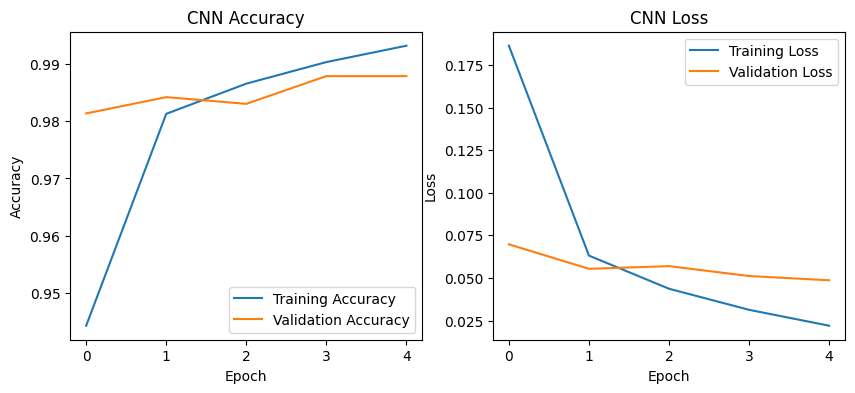

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Ubah bentuk data agar sesuai dengan input CNN [samples, height, width, channels]
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Bangun arsitektur model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Tugas Kecil

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9178 - loss: 0.2677 - val_accuracy: 0.9878 - val_loss: 0.0425
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9875 - val_loss: 0.0441
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9878 - val_loss: 0.0450
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9939 - loss: 0.0170 - val_accuracy: 0.9903 - val_loss: 0.0406
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9908 - val_loss: 0.0407


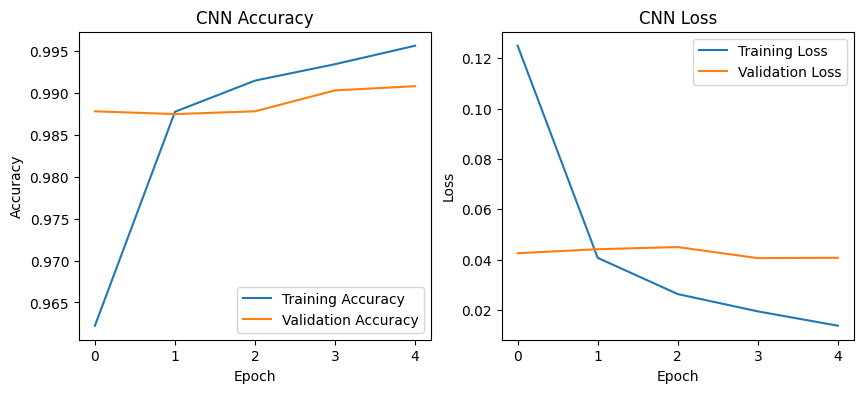

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Ubah bentuk data agar sesuai dengan input CNN [samples, height, width, channels]
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Bangun arsitektur model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### D4 – CNN dengan Dataset CIFAR-10 (RGB)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3764 - loss: 1.7174 - val_accuracy: 0.5726 - val_loss: 1.2114
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5815 - loss: 1.1847 - val_accuracy: 0.6418 - val_loss: 1.0401
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6477 - loss: 1.0071 - val_accuracy: 0.6604 - val_loss: 0.9718
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6853 - loss: 0.9110 - val_accuracy: 0.6640 - val_loss: 0.9549
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7112 - loss: 0.8286 - val_accuracy: 0.6850 - val_loss: 0.9164
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7324 - loss: 0.7666 - val_accuracy: 0.6798 - val_loss: 0.9446
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7458 - loss: 0.7216 - val_accuracy: 0.6900 - val_loss: 0.8939
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7652 - loss: 0.6766 

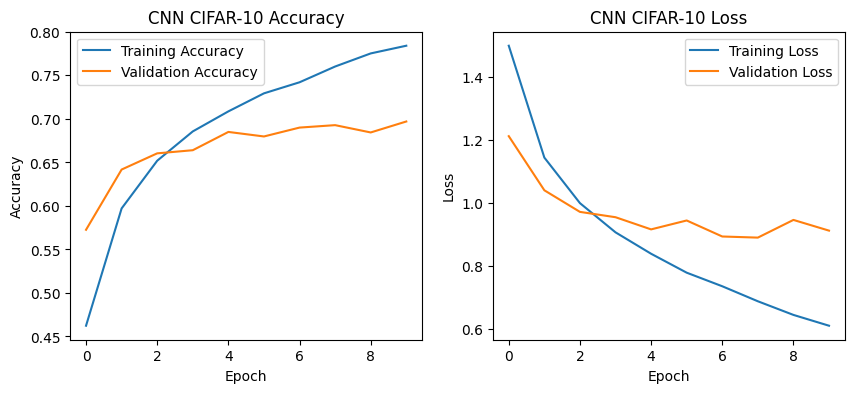

In [ ]:
from tensorflow.keras.datasets import cifar10

# Load data CIFAR-10 dan normalisasi
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN untuk CIFAR-10
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Tugas Kecil

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2765 - loss: 1.9414 - val_accuracy: 0.5302 - val_loss: 1.3520
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4677 - loss: 1.4750 - val_accuracy: 0.5792 - val_loss: 1.1914
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5232 - loss: 1.3327 - val_accuracy: 0.6086 - val_loss: 1.1168
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5591 - loss: 1.2344 - val_accuracy: 0.6356 - val_loss: 1.0566
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5795 - loss: 1.1749 - val_accuracy: 0.6342 - val_loss: 1.0326
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6004 - loss: 1.1192 - val_accuracy: 0.6498 - val_loss: 1.0283
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6150 - loss: 1.0823 - val_accuracy: 0.6610 - val_loss: 0.9613
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6282 - loss: 1.0483 

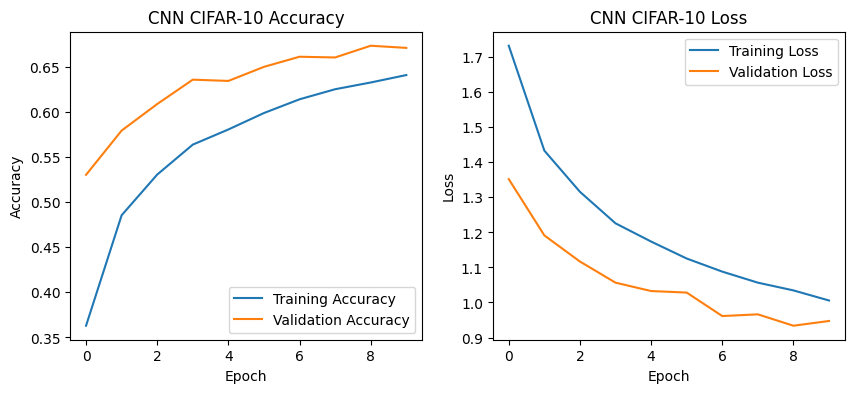

In [ ]:
import matplotlib.pyplot
from tensorflow.keras.datasets import cifar10


# Load data CIFAR-10 dan normalisasi
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN untuk CIFAR-10
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### D5 – Transfer Learning (VGG16/ResNet50)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.4525 - loss: 1.5573 - val_accuracy: 0.5660 - val_loss: 1.2362
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5832 - loss: 1.2007 - val_accuracy: 0.5796 - val_loss: 1.1892
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5972 - loss: 1.1533 - val_accuracy: 0.5880 - val_loss: 1.1710
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6168 - loss: 1.0994 - val_accuracy: 0.6054 - val_loss: 1.1231
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6306 - loss: 1.0601 - val_accuracy: 0.6124 - val_loss: 1.1120


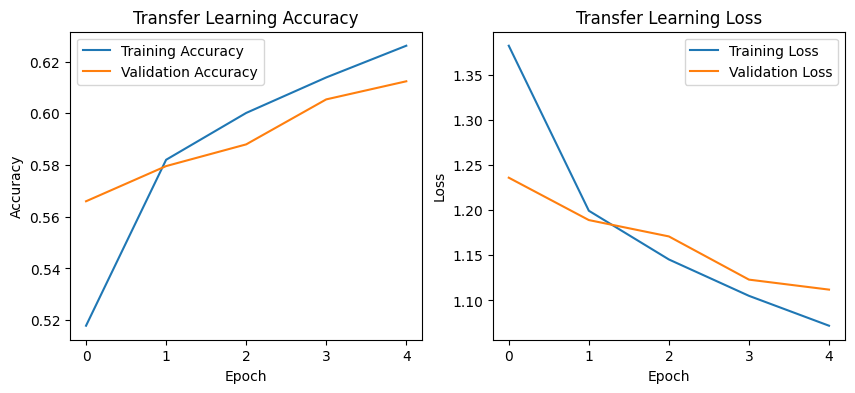

In [ ]:
from tensorflow.keras.applications import VGG16

# Load base model VGG16 (pre-trained ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # freeze convolutional layers

# Bangun model transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Latih model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Plot hasil training
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Tugas Kecil

Status Trainable Lapisan VGG16:
input_layer_6: Trainable = False
block1_conv1: Trainable = False
block1_conv2: Trainable = False
block1_pool: Trainable = False
block2_conv1: Trainable = False
block2_conv2: Trainable = False
block2_pool: Trainable = False
block3_conv1: Trainable = False
block3_conv2: Trainable = False
block3_conv3: Trainable = False
block3_pool: Trainable = False
block4_conv1: Trainable = False
block4_conv2: Trainable = False
block4_conv3: Trainable = False
block4_pool: Trainable = False
block5_conv1: Trainable = False
block5_conv2: Trainable = True
block5_conv3: Trainable = True
block5_pool: Trainable = True
------------------------------

Memulai proses training...
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.4277 - loss: 1.6784 - val_accuracy: 0.6288 - val_loss: 1.0746
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6354 - loss: 1.0561 - val_accuracy: 0.6596 - val_loss: 0.9834
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 1

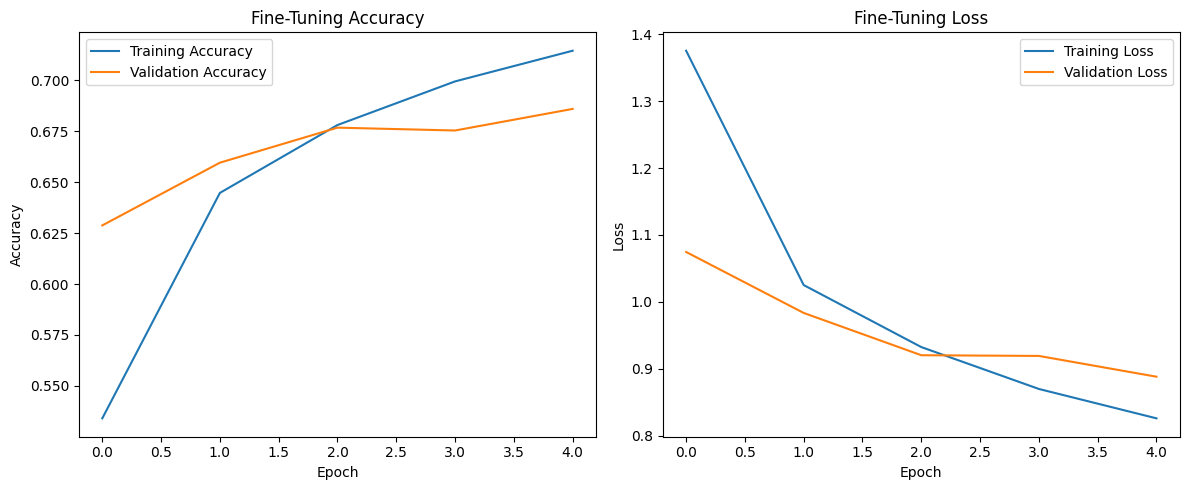

In [ ]:
# 1. Import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np # Diperlukan untuk membuat data dummy

# ===================================================================
# MEMBUAT DATA DUMMY (HANYA UNTUK CONTOH AGAR KODE BISA DIJALANKAN)
# Ganti bagian ini dengan data asli Anda (x_train, y_train)
(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
# ===================================================================

# 2. Load base model VGG16 (pre-trained ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 3. Freeze convolutional layers AWALNYA
base_model.trainable = False

# 4. TUGAS KECIL: FINE-TUNING (mengaktifkan beberapa lapisan terakhir)
base_model.trainable = True # Aktifkan semua

# Pilih berapa lapisan dari belakang yang mau di-fine-tune (misal: 3 lapisan terakhir)
layers_to_fine_tune = 3
for layer in base_model.layers[:-layers_to_fine_tune]:
    layer.trainable = False # Bekukan kembali lapisan lainnya

# Cek status setiap lapisan
print("Status Trainable Lapisan VGG16:")
for layer in base_model.layers:
    print(f"{layer.name}: Trainable = {layer.trainable}")
print("-" * 30)


# 5. Bangun model transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # Asumsi ada 10 kelas
])

# 6. Kompilasi model dengan LEARNING RATE RENDAH untuk fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5), # Learning rate kecil sangat penting!
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Latih model
print("\nMemulai proses training...")
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
print("Training selesai.")

# 8. PLOT HASIL TRAINING (Bagian ini yang akan menghasilkan grafik)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout() # Agar judul tidak tumpang tindih
plt.show() # Perintah untuk MENAMPILKAN grafik

### D6 – Evaluasi dengan Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.67      0.87      0.76      1000
           2       0.68      0.55      0.61      1000
           3       0.53      0.52      0.52      1000
           4       0.58      0.69      0.63      1000
           5       0.66      0.54      0.59      1000
           6       0.67      0.78      0.72      1000
           7       0.80      0.69      0.74      1000
           8       0.78      0.80      0.79      1000
           9       0.78      0.69      0.73      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



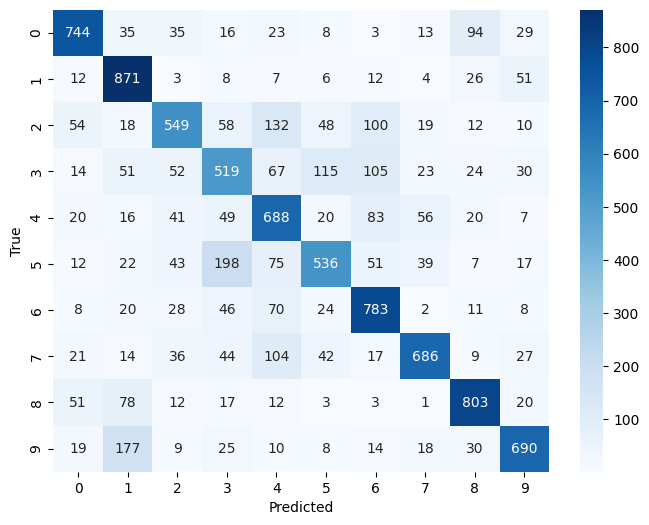

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Penugasaan

In [7]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """

    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]
    return canvas, arr

Saving Angka_Satu.jpg to Angka_Satu.jpg


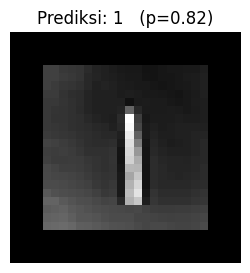

Rekap Prediksi (CNN):
- Angka_Satu.jpg -> 1 (p=0.825)


In [8]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname) #membuat objek yang punya properti width, height, dll dan bisa dibuat menjadi array menggunakan np.array
    disp, x = preprocess_to_mnist_28x28(img_pil) # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)         # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0] # 10 kelas 0 - 9
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

# Tampilkan hasil
plt.figure(figsize=(3,3))
plt.imshow(disp, cmap='gray')
plt.title(f"Prediksi: {pred}   (p={conf:.2f})")
plt.axis('off')
plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")